In [0]:
# Install fastai
#!pip3 install fastai

In [0]:
from fastai.imports import *

In [4]:

# Install PyTorch# Insta 
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

    100% |████████████████████████████████| 592.3MB 56.2MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1
    100% |████████████████████████████████| 2.0MB 8.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
!mkdir data

In [7]:
!wget http://files.fast.ai/data/dogscats.zip -P data/


Redirecting output to ‘wget-log’.


In [8]:
!unzip data/dogscats.zip -d data/ | awk 'BEGIN { ORS = " " } { print "." }'

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [9]:
!ls data/dogscats 

models	sample	test1  train  valid


In [0]:
PATH = "data/dogscats/"
sz=224

In [0]:
!rm data/dogscats.zip

In [0]:
from fastai.imports import *

In [0]:

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [14]:
import torch
torch.cuda.is_available()

True

In [15]:
torch.backends.cudnn.enabled

True

In [6]:
os.listdir(PATH)

['sample', 'train', 'test1', 'models', 'valid']

In [0]:
files=os.listdir(f'{PATH}train/dogs')

In [8]:
files[20:30]

['dog.1016.jpg',
 'dog.100.jpg',
 'dog.6854.jpg',
 'dog.9450.jpg',
 'dog.8020.jpg',
 'dog.10528.jpg',
 'dog.9511.jpg',
 'dog.8582.jpg',
 'dog.3212.jpg',
 'dog.6688.jpg']

In [0]:
#!ls data/dogscats/train/dogs

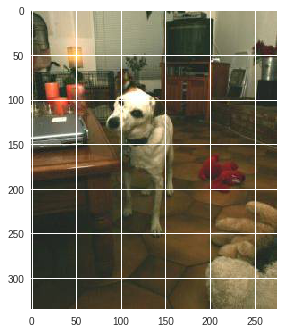

In [9]:
img = plt.imread(f'{PATH}train/dogs/{files[20]}')
plt.imshow(img);

In [0]:
arch=resnet34
bs=64

In [0]:
m=arch(pretrained=True)

In [14]:
m

ResNet(
  (conv1): Conv2d (3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNo

In [0]:
m=nn.Sequential(*children(m)[:-2], nn.Conv2d(512,2,3, padding=1), nn.AdaptiveAvgPool2d(1),Flatten(),nn.LogSoftmax())

In [0]:
tfms=tfms_from_model(m, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
data=ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms)

In [0]:
learn=ConvLearner.from_model_data(m,data)

In [0]:
learn.freeze_to(-4)

In [33]:
learn.fit(0.01,1)

epoch      trn_loss   val_loss   accuracy   
    0      0.142365   0.097371   0.988     



[array([0.09737]), 0.988]

In [34]:
learn.fit(0.01,1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.078297   0.074829   0.9905    



[array([0.07483]), 0.9905]

In [0]:
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): 
        self.features = to_np(output)
    def remove(self): self.hook.remove()

In [0]:
sf=SaveFeatures(m[-4])

In [52]:
sf.remove()
sf.features[0]

TypeError: ignored